In [1]:
import numpy as np

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [3]:

data_raw=load_iris()

data_x=data_raw['data'][:100]
data_y=data_raw['target'][:100]

data_all=pd.DataFrame(data_x)
data_all['target']=data_y

test_data=data_all.sample(frac=0.2)

train_data=data_all.drop(test_data.index)

$${\displaystyle f(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{1+e^{x}}}}$$

$${\displaystyle {\frac {d}{dx}}f(x)={\frac {e^{x}}{(1+e^{x})^{2}}}=f(x)(1-f(x))}
$$

In [4]:
def sigmoid(x,deri=False):
    x=np.array(x,dtype=np.float128)
    if deri==False:
        
        return np.array(1/(1+np.exp(-x)),dtype=np.float128)
    elif deri==True:
        return np.array(sigmoid(x)*(1-sigmoid(x)),dtype=np.float128)
    else:
        print('input error')

In [5]:
X=train_data.iloc[:,0:4]
X=X.T.as_matrix()
Y=train_data.iloc[:,4]
Y=Y.T.as_matrix().reshape(1,-1)

In [6]:
X_mean=X.mean(axis=1).reshape(X.shape[0],1)

In [7]:
X_std=X.std(axis=1).reshape(X.shape[0],1)

In [8]:
X=((X-X_mean)/X_std)

In [9]:
X_test=test_data.iloc[:,0:4]
X_test=X_test.T.as_matrix()
Y_test=test_data.iloc[:,4]
Y_test=Y_test.as_matrix().reshape(1,-1)

# Net shape: data dimention of  each layer =[4,5,2,1]
 
X.shape=(4,80)

$ Z^{[1]}=W^{[1]}X+B^{[1]}   \\
A^{[1]}=sigmoid(Z^{[1]})   \\
Z^{[2]}=W^{[2]}X+B^{[2]}   \\
A^{[2]}=sigmoid(Z^{[2]})  
$

 

## layer 0 =data input

In [10]:
X.shape

(4, 80)

In [11]:
Y.shape

(1, 80)

In [12]:
def cost(AL,Y):
    m=Y.shape[1]
    cost = (-1/m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    return   cost



In [13]:

W1=10*0.001*np.random.rand(5,4)
B1=np.zeros(shape=(W1.shape[0],1))
W2=10*0.001*np.random.rand(2,5)
B2=np.zeros(shape=(W2.shape[0],1))
W3=10*0.001*np.random.rand(1,2)
B3=np.zeros(shape=(W3.shape[0],1))






In [14]:
cost_list=[]
iterations=[]
 

In [15]:
iteration_number=1000000
for i in range(iteration_number):

    # forward

    learning_rate=0.0075*5

    Z1=W1.dot(X)+B1   
    A1=sigmoid(Z1)
    A1=np.array(A1,dtype=np.float128)

    Z2=W2.dot(A1)+B2
    A2=sigmoid(Z2)
    A2=np.array(A2,dtype=np.float128)

    Z3=W3.dot(A2)+B3
    A3=sigmoid(Z3)
    A3=np.array(A3,dtype=np.float128)


    dA3 = - (np.divide(Y, A3) - np.divide(1 - Y, 1 - A3))
    dA3=np.array(dA3,dtype=np.float128)

    if i %(iteration_number/100)==0:

        cost_list.append(cost(A3,Y))
        iterations.append(i)
        try:
            print("cost = ",cost_list[-1]," ; cost/cost_previous =  ",(cost_list[-1]/cost_list[-2]))
        except:
            print("cost = ",cost_list[-1])

        
        
        
    # backforward




    m=Y.shape[1]
    

    dW3=(1/m)*(dA3*sigmoid(Z3,deri=True)).dot(A2.T )

    dZ3=dA3*sigmoid(Z3,deri=True)

    dB3=(1/m)*np.sum(dZ3,axis=1,keepdims=True)


    dA2=W3.T.dot(dZ3)

    dZ2=dA2*sigmoid(Z2,deri=True)

    dW2=(1/m)*dZ2.dot(A1.T)

    dB2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)

    dA1=W2.T.dot(dZ2)
    dZ1=dA1*sigmoid(Z1,deri=True)

    A0=X

    dW1=(1/m)*dZ1.dot(A0.T)

    dB1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)



    W1+=-learning_rate* dW1
    B1+=-learning_rate* dB1
    W2+=-learning_rate* dW2
    B2+=-learning_rate* dB2
    W3+=-learning_rate* dW3
    B3+=-learning_rate* dB3


cost =  0.693503641923
cost =  0.688136652958  ; cost/cost_previous =   0.992261051507
cost =  0.687864035777  ; cost/cost_previous =   0.999603832785
cost =  0.013009627152  ; cost/cost_previous =   0.0189130794392
cost =  0.00496936287873  ; cost/cost_previous =   0.381975810733
cost =  0.00306601543007  ; cost/cost_previous =   0.616983606328
cost =  0.00221612627155  ; cost/cost_previous =   0.722803365506
cost =  0.00173493514503  ; cost/cost_previous =   0.782868362377
cost =  0.00142535145489  ; cost/cost_previous =   0.821558926269
cost =  0.00120948933885  ; cost/cost_previous =   0.848555164899
cost =  0.00105039402157  ; cost/cost_previous =   0.868460752675
cost =  0.000928279395356  ; cost/cost_previous =   0.883743982064
cost =  0.000831596238959  ; cost/cost_previous =   0.895846921863
cost =  0.0007531504569  ; cost/cost_previous =   0.905668426114
cost =  0.000688227271804  ; cost/cost_previous =   0.91379785473
cost =  0.000633607973484  ; cost/cost_previous =   0.920

In [16]:
cost_list

[0.69350364192273245581,
 0.68813665295806612207,
 0.6878640357768122408,
 0.013009627152014115144,
 0.0049693628787263635939,
 0.0030660154300674242534,
 0.0022161262715456126258,
 0.0017349351450256798949,
 0.0014253514548928817786,
 0.0012094893388451966654,
 0.0010503940215662894001,
 0.0009282793953556697462,
 0.0008315962389586164995,
 0.00075315045690031272444,
 0.00068822727180437421717,
 0.00063360797348418096186,
 0.0005870201758744051242,
 0.00054681387252193702683,
 0.00051176202811852023378,
 0.00048093321658571744609,
 0.0004536076630353718159,
 0.00042922036089175311043,
 0.00040732159763186590879,
 0.0003875489752932270746,
 0.00036960720153747570104,
 0.00035325324500017246703,
 0.00033828526414073471007,
 0.00032453423602143634841,
 0.00031185754686866732107,
 0.00030013402823006035738,
 0.00028926007213542502548,
 0.00027914656119890457331,
 0.00026971642095810714153,
 0.00026090265212073664108,
 0.00025264673641820814814,
 0.00024489733584893766622,
 0.0002376092241

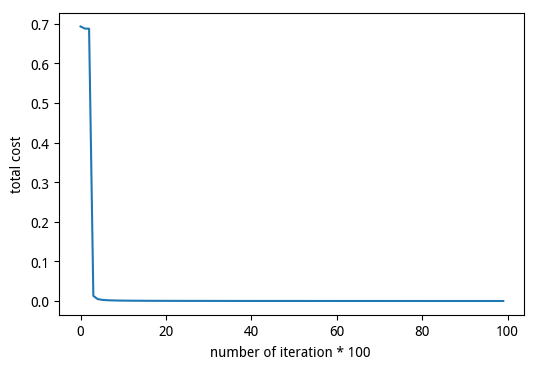

In [28]:
plt.plot(cost_list)
plt.xlabel('number of iteration * 100 ')
plt.ylabel('total cost')
plt.show()

In [18]:
Y_test.shape

(1, 20)

In [19]:
cost_list

[0.69350364192273245581,
 0.68813665295806612207,
 0.6878640357768122408,
 0.013009627152014115144,
 0.0049693628787263635939,
 0.0030660154300674242534,
 0.0022161262715456126258,
 0.0017349351450256798949,
 0.0014253514548928817786,
 0.0012094893388451966654,
 0.0010503940215662894001,
 0.0009282793953556697462,
 0.0008315962389586164995,
 0.00075315045690031272444,
 0.00068822727180437421717,
 0.00063360797348418096186,
 0.0005870201758744051242,
 0.00054681387252193702683,
 0.00051176202811852023378,
 0.00048093321658571744609,
 0.0004536076630353718159,
 0.00042922036089175311043,
 0.00040732159763186590879,
 0.0003875489752932270746,
 0.00036960720153747570104,
 0.00035325324500017246703,
 0.00033828526414073471007,
 0.00032453423602143634841,
 0.00031185754686866732107,
 0.00030013402823006035738,
 0.00028926007213542502548,
 0.00027914656119890457331,
 0.00026971642095810714153,
 0.00026090265212073664108,
 0.00025264673641820814814,
 0.00024489733584893766622,
 0.0002376092241

In [20]:
X_test_mean=X_test.mean(axis=1).reshape(X_test.shape[0],1)
X_test_std=X_test.std(axis=1).reshape(X_test.shape[0],1)

X_test=(X_test-X_test_mean)/X_test_std

In [21]:
Z1=W1.dot(X_test)+B1   
A1=sigmoid(Z1)

Z2=W2.dot(A1)+B2
A2=sigmoid(Z2)

Z3=W3.dot(A2)+B3
A3=sigmoid(Z3)

cost(A3,Y_test)

0.00040781307650788346279

In [22]:
A3[0].round(4)

array([ 0.9999,  0.9997,  0.0,  0.9999,  0.9998,  0.0,  0.0,  0.9999,
        0.9997,  0.9999,  0.0,  0.9999,  0.9943,  0.9999,  0.9999,  0.9998,
        0.0,  0.9999,  0.9999,  0.0], dtype=float128)

In [23]:
Y_estimate=A3[0].round()

In [24]:
Y_real=Y_test[0]

In [25]:
recall_score(Y_real,Y_estimate)

1.0

In [26]:
precision_score(Y_real,Y_estimate)

1.0